# K-Nearest Neighbor Model Implementation

### STEPS:

#### INITIAL MODEL
-------------

1. Load train data (have to split this dataset as training and testing)
2. Assess the requirement for normalization
3. Normalize the data IF required
4. Split train / test datasets
5. Fit the model for K = 1 (write it in an iterable way)
6. Predict test data --> build confusion matrix --> calculate accuracy / calculate missclassification error

#### FEATURE ITERATION
-----------------

1. Write a function to get all possible feature combinations into a 2D list
2. Parameterize INITIAL MODEL to take a set of features and predict
3. Provide an output of the results (for each K value which gives the lowest Missclassification Error)

#### FINAL MODEL EVALUATION
----------------------

1. Write a function to take feature combinations in iteratively and run the model
2. Save the output of each iteration into a list to be taken for evaluation

#### IMPORTS

In [18]:
import numpy as np
import pandas as pd
import sklearn.neighbors as skl_nb
import sklearn.model_selection as skl_ms
import matplotlib.pyplot as plt

import sys
sys.path.append("..")

from utils.loading_data  import load_to_df_from_csv, get_all_feature_combinations
from utils.knn_functions import find_best_k_with_misclassification, plot_misclassification

#### STEP 1: LOADING DATA

In [19]:
data = load_to_df_from_csv("../data/train.csv") # Loading the train.csv as the main dataset

# Column Transformation to lowercase and underscored spaces
data.columns = data.columns.str.replace(' ','_')
data.columns = data.columns.str.replace('-','_')
data.columns = data.columns.str.lower()

### Exploring data

In [20]:
data.shape

(1039, 14)

In [21]:
data.describe()

,number_words_female,total_words,number_of_words_lead,difference_in_words_lead_and_co_lead,number_of_male_actors,year,number_of_female_actors,number_words_male,gross,mean_age_male,mean_age_female,age_lead,age_co_lead
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,2334.256015,11004.368624,4108.256978,2525.024062,7.767084,1999.862368,3.507218,4561.855630,111.149182,42.353766,35.929588,38.716073,35.486044
std,2157.216744,6817.397413,2981.251156,2498.747279,3.901439,10.406632,2.088526,3417.855987,151.761551,7.817110,8.957193,12.285902,12.046696
min,0.000000,1351.000000,318.000000,1.000000,1.000000,1939.000000,1.000000,0.000000,0.000000,19.000000,11.000000,11.000000,7.000000
25%,904.000000,6353.500000,2077.000000,814.500000,5.000000,1994.000000,2.000000,2139.500000,22.000000,37.480769,29.500000,30.000000,28.000000
50%,1711.000000,9147.000000,3297.000000,1834.000000,7.000000,2000.000000,3.000000,3824.000000,60.000000,42.600000,35.000000,38.000000,34.000000
75%,3030.500000,13966.500000,5227.000000,3364.000000,10.000000,2009.000000,5.000000,5887.500000,143.500000,47.333333,41.500000,46.000000,41.000000
max,17658.000000,67548.000000,28102.000000,25822.000000,29.000000,2015.000000,16.000000,31146.000000,1798.000000,71.000000,81.333333,81.000000,85.000000


### STEP 2 / 3: NORMALIZATION - To be done after the initial model implementation

### STEP 4: SPLIT TRAIN / TEST DATASETS

In [22]:
'''np.random.seed(1)
trainI = np.random.choice(data.shape[0], size = 727, replace = False)
trainIndex = data.index.isin(trainI)

train = data.iloc[trainIndex]
test = data.iloc[~trainIndex]

X_train = train.iloc[:, 0:train.shape[1] - 1]
X_test = test.iloc[:, 0:test.shape[1] - 1]
y_train = train.iloc[:, -1]
y_test = test.iloc[:, -1]'''

X_train, X_test, y_train, y_test = skl_ms.train_test_split(data.iloc[:, 0:data.shape[1] - 1], data.iloc[:, -1], test_size=0.30, random_state=123)

In [33]:
feature_combinations = get_all_feature_combinations(X_train.columns)

#feature_combinations[8191]

['number_words_female',
 'total_words',
 'number_of_words_lead',
 'difference_in_words_lead_and_co_lead',
 'number_of_male_actors',
 'year',
 'number_of_female_actors',
 'number_words_male',
 'gross',
 'mean_age_male',
 'mean_age_female',
 'age_lead',
 'age_co_lead']

### STEP 5: FIT K-NN MODEL TO DATA

In [24]:
model = skl_nb.KNeighborsClassifier(n_neighbors = 18)
model.fit(X_train, y_train) # Fit the model to data

KNeighborsClassifier(n_neighbors=18)

### STEP 6: PREDICT TEST DATA

In [25]:
prediction = model.predict(X_test)
print('Confusion matrix:\n')
print(pd.crosstab(prediction, y_test), '\n')
print(f"Accuracy: {np.mean(prediction == y_test):.3f}")

Confusion matrix:

lead    Female  Male
row_0               
Female      11     3
Male        70   228 

Accuracy: 0.766


### FINDING BEST K

Best K --> 13
Lowest Misclassification Error --> 0.24358974358974358


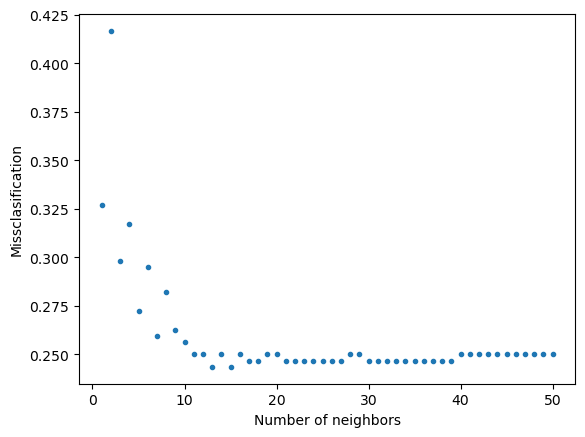

In [53]:
best_k, lowest_misclassification = find_best_k_with_misclassification(X_train[feature_combinations[25]], y_train, X_test[feature_combinations[25]], y_test, 30)
print("Best K --> " + str(best_k))
print("Lowest Misclassification Error --> " + str(lowest_misclassification))

plot_misclassification(X_train[feature_combinations[25]], y_train, X_test[feature_combinations[25]], y_test, 50)

In [54]:
# Model Iteration
def model_iterator(X_train, y_train, X_test, y_test, iterations):
    results_column_names = [
        'number_words_female', 
        'total_words',
        'number_of_words_lead',
        'difference_in_words_lead_and_co_lead',
        'number_of_male_actors',
        'year',
        'number_of_female_actors',
        'number_words_male',
        'gross',
        'mean_age_male',
        'mean_age_female',
        'age_lead',
        'age_co_lead',
        'best_k',
        'lowest_misclassification',
        'iteration_no'
        ]

    results = pd.DataFrame(columns = results_column_names)

    for iteration in range(1, iterations + 1):
        best_k, lowest_misclassification = find_best_k_with_misclassification(X_train[feature_combinations[iteration]], y_train, X_test[feature_combinations[iteration]], y_test, 30)
        
        row = {
            'number_words_female': 0,
            'total_words': 0,
            'number_of_words_lead': 0,
            'difference_in_words_lead_and_co_lead': 0,
            'number_of_male_actors': 0,
            'year': 0,
            'number_of_female_actors': 0,
            'number_words_male': 0,
            'gross': 0,
            'mean_age_male': 0,
            'mean_age_female': 0,
            'age_lead': 0,
            'age_co_lead': 0,
            'best_k': best_k,
            'lowest_misclassification': lowest_misclassification,
            'iteration_no': iteration
        }

        for key, value in row.items():
            if key in feature_combinations[iteration]:
                row[key] = 1
            else:
                pass
        
        # new_result = pd.DataFrame(row)
        results = results.append(row, ignore_index=True)
        # results = pd.concat([new_result, results])

    return results

# results = model_iterator(X_train, y_train, X_test, y_test, iterations = 8191)


/var/folders/tt/_tq7thkd6hx_grhd7r9xdfr40000gn/T/ipykernel_8979/3797758641.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row, ignore_index=True)
/var/folders/tt/_tq7thkd6hx_grhd7r9xdfr40000gn/T/ipykernel_8979/3797758641.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row, ignore_index=True)
/var/folders/tt/_tq7thkd6hx_grhd7r9xdfr40000gn/T/ipykernel_8979/3797758641.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row, ignore_index=True)
/var/folders/tt/_tq7thkd6hx_grhd7r9xdfr40000gn/T/ipykernel_8979/3797758641.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

IndexError: list index out of range

In [50]:
# results.to_csv(r'/Users/dininduseneviratne/Library/CloudStorage/OneDrive-Uppsalauniversitet/Statistical Machine Learning/results_1000.csv')